# Homework 4: Tables and Functions
The tools that we've learned over the last week (for example, function definitions, histograms, and the table methods `where`, `apply`, and `group`) are enough to analyze a wide range of questions and datasets.  

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests.

In [1]:
# Don't change this cell; just run it. 
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('hw04.ok')
_ = ok.auth(inline=True)

Assignment: Homework 4: Tables and Functions
OK, version v1.12.6


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: JBOUUJxwKUVg1IheBcl63UdoNORBCo
Successfully logged in as austenzhu@berkeley.edu


Reading:
- Textbook chapters [6](https://data-8r.gitbooks.io/textbook/chapters/06/tables.html) and [7](https://data-8r.gitbooks.io/textbook/chapters/07/functions-and-tables.html)

Deadline:

This assignment is due **Tuesday, July 25 at 1PM**. You will receive an early submission bonus point if you turn in your final submission by **Monday, July 24 at 1PM**. Late work will not be accepted unless you have made special arrangements with your TA or the instructor.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

You should start early so that you have time to get help if you're stuck. Drop-in office hours will be held at various times in the week; check the course calendar on the [course webpage](http://data8r.org) for the latest schedule.

Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission.

In [2]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not save your notebook. Make sure your notebook is saved before sending it to OK!
Submit... 100% complete
Submission successful for user: austenzhu@berkeley.edu
URL: https://okpy.org/cal/data8r/su17/hw04/submissions/kRgADr



## 1. Review of Histograms


We measure the heights of the members of 200 families that each included 1 mother, 1 father, and some varying number of adult sons. We make the following histograms, with all bins being two inches wide.

![](three_height_histograms.png)

#### Question 1

For each quantity listed below, either calculate its value using the histograms, or write *Unknown* if it is not possible to calculate the value numerically given the information we have.
1. The **percentage** of mothers that are at least 60 inches but less than 64 inches tall.
2. The **percentage** of fathers that are at least 64 inches but less than 67 inches tall.
3. The **number** of mothers that are at least 60 inches tall.
4. The **number** of sons that are at least 70 inches tall.

**SOLUTION:** 1. 40 percent 2. Unknown 3. 192 mothers 4. Unknown

#### Question 2
If the fathers' histogram was redrawn with bins of width 4, what would be the height of the bar for the bin from 72 to 76?

**SOLUTION:** 4 percent per inch

#### Question 3
Some of the sons in the dataset are taller than all of the mothers.  It isn't possible to tell exactly how many, because the binning disguises the exact height values of the mothers and sons.  However, we can calculate upper and lower bounds on the value using our histograms. What's the lowest possible value for the percentage of sons who are taller than all of the mothers? The highest possible value?

**SOLUTION:** Lowest possible - 20 percent. (The last nonzero bin for the mothers is 70-72.  So all the sons in the 72-74 and 74-76 bins are certainly taller than all the mothers, and the total area of those two bars is 20 percent.)  Highest possible - 48 percent. (Suppose all the mothers in the 70-72 bin have height, say, 70.5, and all the sons in the 70-72 bin have height 71.  Then all the sons in the 70-72 bin are taller than all the mothers, so we add the areas of the 70-72, 72-74, and 74-76 sons' bins.  That's 48 percent.)

Run the following cell to load some more height data, this time on 100 adult men and women.

In [3]:
height_data = Table().read_table("Height_Data.csv")
male_heights = height_data.column("Male Height")
female_heights = height_data.column("Female Height")
all_heights = np.append(male_heights, female_heights)
height_data

Sample Number,Male Height,Female Height
0,67,65
1,66,65
2,71,66
3,76,64
4,71,65
5,67,66
6,73,66
7,73,64
8,70,64
9,73,63


#### Question 4
Create a histogram of the heights of the various men in the sample. Then, do the same for women.

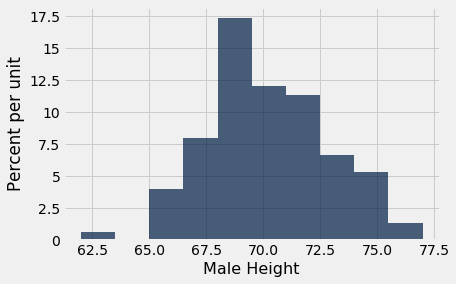

In [4]:
height_data.hist("Male Height") #SOLUTION

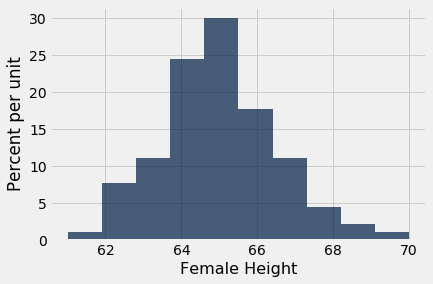

In [5]:
height_data.hist("Female Height") #SOLUTION

#### Question 5
Ccreate a single histogram of the heights of everyone in the sample, both men and women. 

*Hint: You will need to use the `all_heights` variable, and make a new table*.

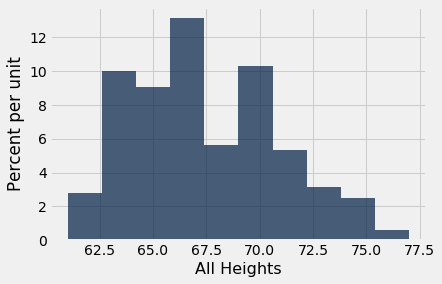

In [6]:
Table().with_columns("All Heights", all_heights).hist() #SOLUTION

## 2. Writing Documentation for Functions


When you want to figure out how to use a function, typing its name and a question mark in a code cell (and then running the cell) will show you its *documentation*.  It's a good idea to write documentation for the functions you write, too.  This exercise will give you practice with that.

**Question 1.** The function below does something interesting, but it's been left without documentation.  Figure out what it does by calling it.  (We've given three example calls to get you started.)  Then write documentation that would help someone understand what the function does.  At a minimum, you should describe:

* what the function does, in one short sentence;
* the purpose and type of each argument; and
* what the function returns.

You can follow the [NumPy guidelines for documenting functions](http://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_numpy.html) if you like.

**Note:** To complete this exercise, you need to be able to hear audio output from the device you're using.

In [7]:
def mystery_function(arg0, arg1, arg2):
    """Produces a sound that slides from one pitch to another over a time interval.

    Parameters
    ----------
    arg0 : float or int
        The frequency of the starting pitch.
    arg1 : float or int
        The frequency of the ending pitch.
    arg2 : float or int
        The duration of the sound, in seconds.

    Returns
    -------
    IPython.display.Audio
        A sound that starts at frequency arg0 and ends at frequency arg1, sliding
        from one to the other.  It lasts for arg2 seconds.
    """
    v = 10000
    w = v*arg2
    x = np.linspace(arg0, arg1, w)
    y = np.cumsum(x) / v
    z = np.sin(2*np.pi*y)
    from IPython.display import Audio
    return Audio(z, rate=v)

In [8]:
mystery_function(220, 220, 2)

In [9]:
mystery_function(440, 220, 2)

## 3. The Climate near Berkeley


The US National Oceanic and Atmospheric Administration (NOAA) operates thousands of climate observation stations (mostly in the US) that collect information about local climate.  Among other things, each station records the highest and lowest observed temperature each day.  These data, called "Quality Controlled Local Climatological Data," are publicly available [here](http://www.ncdc.noaa.gov/orders/qclcd/) and described [here](https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/quality-controlled-local-climatological-data-qclcd).

We've provided you with an excerpt of that dataset.  All the readings are from 2015 and from California stations.

**Question 1.** Load the data from `temperatures.csv` into a table called `temperatures`.  Check out the columns in the table.  Each row represents the data from one station on one day.  The column "Date" is in MMDD format, meaning that the last two digits denote the day of the month, and the first 1 or 2 digits denote the month.

In [10]:
temperatures = Table.read_table("temperatures.csv") #SOLUTION
temperatures

Highest temp that day (F),Lowest temp that day (F),Date,Latitude,Longitude,Station name
77,63,902,33.286,-117.456,Oceanside
66,52,1110,33.286,-117.456,Oceanside
69,55,323,33.286,-117.456,Oceanside
73,51,1119,33.286,-117.456,Oceanside
78,55,1206,33.286,-117.456,Oceanside
61,42,1215,33.286,-117.456,Oceanside
70,54,415,33.286,-117.456,Oceanside
71,64,614,33.286,-117.456,Oceanside
70,60,527,33.286,-117.456,Oceanside
76,59,1026,33.286,-117.456,Oceanside


In [11]:
_ = ok.grade('q3_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Each station is named for the city in which it resides.  Is there a station in Berkeley?  Write code to help you answer the question in the next cell, and then write your answer in the cell after that, along with **an English explanation** of what your code does.

*Hint:* Use the Table method `.where`.

In [12]:
berkeley_readings = temperatures.where("Station name", are.equal_to("Berkeley"))
berkeley_readings

Highest temp that day (F),Lowest temp that day (F),Date,Latitude,Longitude,Station name


In [13]:
# Use this cell to work on this problem.

**SOLUTION:** No, there aren't any stations in Berkeley.  We selected the rows in `temperatures` where the station name was "Berkeley" and found none.  If there were a station in Berkeley, the prompt promised that it would be named Berkeley.

Let's find the station closest to the UC Berkeley campus.  The campus is located roughly at latitude 37.871746 and longitude -122.259030.  We'll break this down into a few steps.

**Question 3.** Create a table called `with_degree_differences` that's a copy of `temperatures`, but with 2 extra columns:

1. "Latitude difference": The difference between the latitude of the row's station and the latitude of UC Berkeley.
2. "Longitude difference": The difference between the longitude of the row's station and the longitude of UC Berkeley.

In [14]:
# We've provided the lat/long of UC Berkeley so you don't have to retype them:
BERKELEY_LATITUDE = 37.871746
BERKELEY_LONGITUDE = -122.259030

with_degree_differences = temperatures.with_columns( #SOLUTION
    "Latitude difference", temperatures.column("Latitude") - BERKELEY_LATITUDE, #SOLUTION
    "Longitude difference", temperatures.column("Longitude") - BERKELEY_LONGITUDE) #SOLUTION
with_degree_differences

Highest temp that day (F),Lowest temp that day (F),Date,Latitude,Longitude,Station name,Latitude difference,Longitude difference
77,63,902,33.286,-117.456,Oceanside,-4.58575,4.80303
66,52,1110,33.286,-117.456,Oceanside,-4.58575,4.80303
69,55,323,33.286,-117.456,Oceanside,-4.58575,4.80303
73,51,1119,33.286,-117.456,Oceanside,-4.58575,4.80303
78,55,1206,33.286,-117.456,Oceanside,-4.58575,4.80303
61,42,1215,33.286,-117.456,Oceanside,-4.58575,4.80303
70,54,415,33.286,-117.456,Oceanside,-4.58575,4.80303
71,64,614,33.286,-117.456,Oceanside,-4.58575,4.80303
70,60,527,33.286,-117.456,Oceanside,-4.58575,4.80303
76,59,1026,33.286,-117.456,Oceanside,-4.58575,4.80303


In [15]:
_ = ok.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [16]:
MILES_PER_DEGREE_LATITUDE = 69
MILES_PER_DEGREE_LONGITUDE = 54.6
with_mile_differences = with_degree_differences.with_columns(
    "North-South difference (miles)", with_degree_differences.column("Latitude difference")*MILES_PER_DEGREE_LATITUDE, #SOLUTION
    "East-West difference (miles)", with_degree_differences.column("Longitude difference")*MILES_PER_DEGREE_LONGITUDE) #SOLUTION
with_mile_differences

Highest temp that day (F),Lowest temp that day (F),Date,Latitude,Longitude,Station name,Latitude difference,Longitude difference,North-South difference (miles),East-West difference (miles)
77,63,902,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245
66,52,1110,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245
69,55,323,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245
73,51,1119,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245
78,55,1206,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245
61,42,1215,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245
70,54,415,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245
71,64,614,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245
70,60,527,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245
76,59,1026,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245


In [17]:
_ = ok.grade('q3_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.** Compute the distance from UC Berkeley to each row's station.  By the Pythagorean theorem, the distance is:
$$\sqrt{(\text{North-South difference (miles)})^2 + (\text{East-West difference (miles)})^2}$$

Create a table called `with_distances` that's a copy of `with_mile_differences`, but with an extra column called "Distance to UC Berkeley" containing these distances.

*Hint:* Use elementwise arithmetic operations to square each difference, add them, and square-root them.

In [18]:
# We found it useful to compute an array of the distances on a separate line,
# but you can do whatever you want as long as you define the with_distances
# table appropriately.
distances = (with_mile_differences.column("North-South difference (miles)")**2 + with_mile_differences.column("East-West difference (miles)")**2)**0.5 #SOLUTION
with_distances = with_mile_differences.with_columns(
    "Distance to UC Berkeley", distances) #SOLUTION
with_distances

Highest temp that day (F),Lowest temp that day (F),Date,Latitude,Longitude,Station name,Latitude difference,Longitude difference,North-South difference (miles),East-West difference (miles),Distance to UC Berkeley
77,63,902,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245,410.965
66,52,1110,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245,410.965
69,55,323,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245,410.965
73,51,1119,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245,410.965
78,55,1206,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245,410.965
61,42,1215,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245,410.965
70,54,415,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245,410.965
71,64,614,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245,410.965
70,60,527,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245,410.965
76,59,1026,33.286,-117.456,Oceanside,-4.58575,4.80303,-316.416,262.245,410.965


In [19]:
_ = ok.grade('q3_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** Sort the table by distance to find the station that's closest to Berkeley.  Find its name and assign it to `closest_station_name`.

In [20]:
closest_station_name = with_distances.sort("Distance to UC Berkeley").column("Station name").item(0) #SOLUTION
closest_station_name

'Oakland'

In [21]:
_ = ok.grade('q3_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 7.** Make a table called `closest_station_readings`.  It should be a table like the original `temperatures` table, except it should contain only the rows from the station you found in the previous question.  Sort it in increasing order by date.

Date,Lowest temp that day (F),Highest temp that day (F)
109,46,63
120,45,58
121,40,61
123,39,64
124,46,69
125,40,59
127,47,67
128,43,63
130,46,62
202,43,65


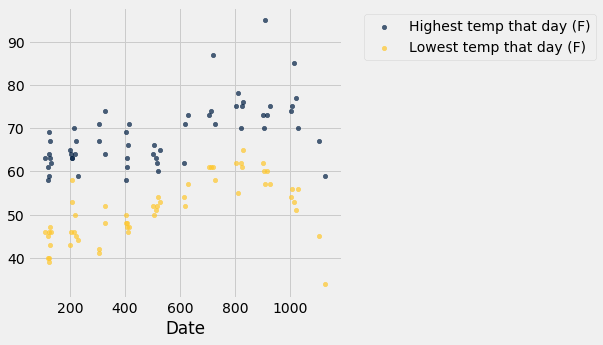

In [22]:
closest_station_readings = temperatures.where("Station name", are.equal_to(closest_station_name)).sort("Date") #SOLUTION

# This prints out your whole table (with unnecessary columns removed).
closest_station_readings.select(2, 1, 0).show()
# This code makes a plot of the highs and lows over time in your table,
# which is easier to read than the raw numbers.  You don't need to modify
# this.
closest_station_readings.scatter(2, make_array(0, 1))

In [23]:
_ = ok.grade('q3_7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 8.** From the graph, can you figure out the hottest and coldest months in 2015, in terms of average minimum temperature?  (If it looks like there's a tie, name all the months that might qualify.  If you can't answer the question from these data, explain why.)

**SOLUTION:** It looks like August was the hottest month, and November was the coldest month.  But there are two reasons to be skeptical of these conclusions: We don't have data from every day (so maybe we missed some particularly cold days in July), and we have no data from December, which we'd normally expect to be colder than November!

## 4. Fixing Misspellings


You're editing a collection of your essays for publication, and you discover that you've been misspelling the word "misspell" as "mispel" your whole life.  You decide to use Python to correct this embarrassing mistake.

**Question 1.** Write a function called `correct_mispel`.  It should take a single string as its argument, and return the same string, but with all instances of "mispel" replaced with "misspell".

*Hint:* Use the string method `.replace`.  It takes two arguments: the piece of text you want to find, and the piece of text you want to replace it with.

In [24]:
def correct_mispel(text):
    return text.replace("mispel", "misspell")

In [25]:
_ = ok.grade('q4_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Now you need to load your data into Python.  The file `essay_filenames.csv` is a table that contains the *filenames* of your essays.  Each filename is a string that's the name of an essay.  Load it into a table called `essay_filenames`.

In [26]:
essay_filenames = Table.read_table("essay_filenames.csv") #SOLUTION
essay_filenames

Name
a_desk_book_of_errors_in_english.txt
how_to_write_letters.txt
lippincotts_horn_ashbaugh_speller.txt
news_writing.txt
the_letters_of_henry_james_volume_I.txt
the_virginian.txt


In [27]:
_ = ok.grade('q4_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Below, we've provided a function that takes as its argument the *filename* of an essay and returns the text in that file (as one long string).  Using `apply`, create a table called `essays` with two columns:

1. "Name": The filename of the essay
2. "Text": The whole text of the essay

(The essays are actually books from [Project Gutenberg](gutenberg.org), modified to misspell "misspell".  Attributions and copyright information are contained in the text of each essay.)

In [28]:
def load_essay(filename):
    """Loads the text in the given file, returning it as one long string."""
    with open(filename, 'r') as essay_file:
        return essay_file.read()

essays = essay_filenames.with_column("Text", essay_filenames.apply(load_essay, "Name")) #SOLUTION
essays

Name,Text
a_desk_book_of_errors_in_english.txt,"Project Gutenberg's A Desk-Book of Errors in English, b ..."
how_to_write_letters.txt,The Project Gutenberg EBook of How to Write Letters (Fo ...
lippincotts_horn_ashbaugh_speller.txt,The Project Gutenberg EBook of Lippincott's Horn-Ashbau ...
news_writing.txt,"The Project Gutenberg EBook of News Writing, by M. Lyle ..."
the_letters_of_henry_james_volume_I.txt,Project Gutenberg's The Letters of Henry James (volume ...
the_virginian.txt,"The Project Gutenberg EBook of The Virginian, by Owen W ..."


In [29]:
_ = ok.grade('q4_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** Using `apply` and the function you wrote earlier, create a table called `corrected_essays` with two columns:

1. "Name": The filename of the essay
2. "Corrected text": The whole text of the essay, with "mispel" corrected as "misspell".

In [30]:
corrected_essays = essays.drop("Text").with_column("Corrected text", essays.apply(correct_mispel, "Text")) #SOLUTION
corrected_essays

Name,Corrected text
a_desk_book_of_errors_in_english.txt,"Project Gutenberg's A Desk-Book of Errors in English, b ..."
how_to_write_letters.txt,The Project Gutenberg EBook of How to Write Letters (Fo ...
lippincotts_horn_ashbaugh_speller.txt,The Project Gutenberg EBook of Lippincott's Horn-Ashbau ...
news_writing.txt,"The Project Gutenberg EBook of News Writing, by M. Lyle ..."
the_letters_of_henry_james_volume_I.txt,Project Gutenberg's The Letters of Henry James (volume ...
the_virginian.txt,"The Project Gutenberg EBook of The Virginian, by Owen W ..."


In [31]:
_ = ok.grade('q4_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Did this do anything?  Were there even misspellings in the original essay?  Let's find out.

**Question 5.** The string method `splitlines` produces an array of the lines of the string.  Use it to make a table called `news_writing_lines` with a column called "Line" containing the lines from the text called "News Writing".  That is, there should be one row in `news_writing_lines` for each line in the text called "News Writing".

In [32]:
news_writing = essays.where("Name", "news_writing.txt").column("Text").item(0) #SOLUTION
news_writing_lines = Table().with_column("Line", news_writing.splitlines()) #SOLUTION
news_writing_lines

Line
"The Project Gutenberg EBook of News Writing, by M. Lyle ..."
""
This eBook is for the use of anyone anywhere at no cost ...
"almost no restrictions whatsoever. You may copy it, giv ..."
re-use it under the terms of the Project Gutenberg Licen ...
with this eBook or online at www.gutenberg.org
""
""
Title: News Writing
"The Gathering , Handling and Writing of News Stories"


In [33]:
_ = ok.grade('q4_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** Use the table method `where` and the predicate `are.containing` to find all the lines in `news_writing_lines` that include the word "mispel".  Make a table of those lines called `misspelled_lines`.

*Note:* You should also find versions of "mispel" like "mispeled" or "mispeling", and your code probably corrected those, too.  That's okay.

In [34]:
misspelled_lines = news_writing_lines.where("Line", are.containing("mispel")) #FIXME #SOLUTION
misspelled_lines

Line
person whose name has been mispeled never quite forgives ...
"mispeled names, misplaced words and phrases, and even in ..."
"printer set up slangy, mispeled, or improperly capitaliz ..."
"bad spelling, because the meaning of a mispeled word usu ..."
mispel


**Question 7.** In the cell below, repeat the work you did in questions 5 and 6, but for the corrected version of "News Writing" you produced in `corrected_essays`.  Did your correction fix the misspellings?

In [35]:
corrected_lines = Table().with_column("Line", corrected_essays.where("Name", "news_writing.txt").column("Corrected text").item(0).splitlines())
misspelled_lines_in_correction = corrected_lines.where("Line", are.containing("mispel")) #FIXME
misspelled_lines_in_correction

Line


**SOLUTION:** Yes, we fixed the misspellings, since our search for misspellings found several in the original but none in the corrected version.

## 5. Causes of Death in California


This exercise is designed to give you practice using the Table method `group`.

We'll be looking at a dataset from the California Department of Public Health (available [here](http://www.healthdata.gov/dataset/leading-causes-death-zip-code-1999-2013) and described [here](http://www.cdph.ca.gov/data/statistics/Pages/DeathProfilesbyZIPCode.aspx)) that records the cause of death (as recorded on a death certificate) for everyone who died in California from 1999 to 2013.  The data are in the file `causes_of_death.csv.zip`.  Each row records the number of deaths by one cause in one year in one ZIP code.

To make the file smaller, we've compressed it; run the next cell to unzip and load it.

In [36]:
!pip install zip
import  zipfile
zip_ref = zipfile.ZipFile("causes_of_death.csv.zip", 'r')
zip_ref.extractall(".")
zip_ref.close()
causes = Table.read_table('causes_of_death.csv')
causes

Year,ZIP Code,Cause of Death,Count,Location
1999,90002,SUI,1,"(33.94969, -118.246213)"
1999,90005,HOM,1,"(34.058508, -118.301197)"
1999,90006,ALZ,1,"(34.049323, -118.291687)"
1999,90007,ALZ,1,"(34.029442, -118.287095)"
1999,90009,DIA,1,"(33.9452, -118.3832)"
1999,90009,LIV,1,"(33.9452, -118.3832)"
1999,90009,OTH,1,"(33.9452, -118.3832)"
1999,90010,STK,1,"(34.060633, -118.302664)"
1999,90010,CLD,1,"(34.060633, -118.302664)"
1999,90010,DIA,1,"(34.060633, -118.302664)"


The causes of death in the data are abbreviated.  If you want to know what the abbreviations mean, we've provided a table called `abbreviations.csv`.

**Question 1.** Find the top 5 causes of death in California over the entire period covered by the data.  To do that, create a table with one row for each of the top 5 causes of death, a column called "Cause of Death", and a column called "Count" that records the total number of deaths due to that cause.  Sort it in descending order by count, and call it `top_5_causes`.

In [37]:
top_5_causes = causes.select(2, 3)\
                     .group(0, sum)\
                     .relabeled('Count sum', 'Count')\
                     .sort(1, descending=True)\
                     .take(np.arange(5))

# To print out the causes in a more readable form, we joined them
# with the abbrevations table.  You didn't need to do this.
abbreviations = Table.read_table('abbreviations.csv')
top_5_causes.join('Cause of Death', abbreviations).sort(1, descending=True)

Cause of Death,Count,Cause of Death (Full Description)
HTD,957108,Diseases of the Heart
CAN,822906,Malignant Neoplasms (Cancers)
OTH,637764,All Other Causes
STK,231897,Cerebrovascular Disease (Stroke)
CLD,194961,Chronic Lower Respiratory Disease (CLRD)


In [38]:
_ = ok.grade('q5_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Create a bar chart that displays the *proportion of all deaths* by each cause.

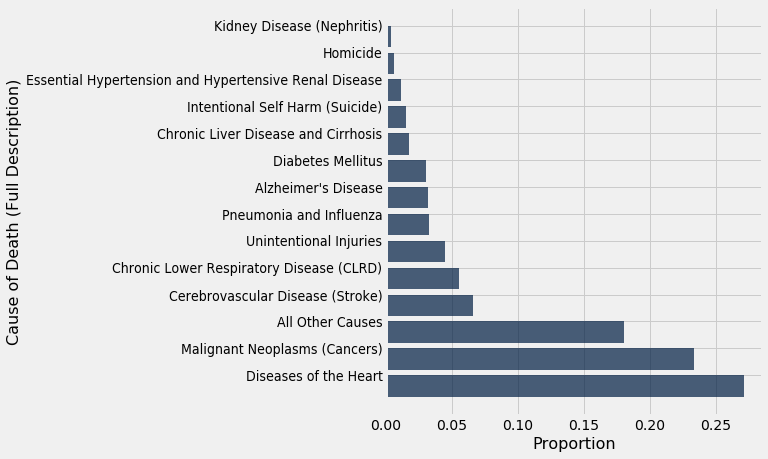

In [39]:
# Again, we've joined with the abbreviations table to make the
# bar chart more clear.  You didn't need to do this.
all_causes = causes.select(2, 3).group(0, sum).join('Cause of Death', abbreviations)
all_causes.drop(0, 1).with_column("Proportion", all_causes.column(1) / sum(all_causes.column(1))).sort(1).barh(0)

**Question 3.** Create a plot of the total number of deaths per year in California.

*Hint:* Use the Table method `plot`.  The first argument is the name or index of the column to put on the horizontal axis.

(0, 300000)

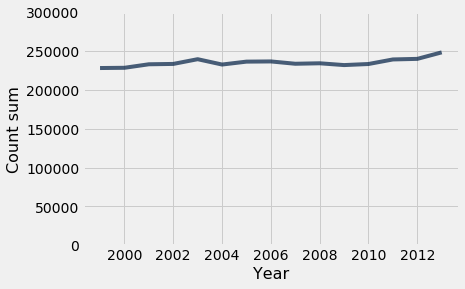

In [40]:
causes.select(0, 3).group(0, sum).plot(0) #SOLUTION

# This line will make the vertical axis start at 0.  You can remove
# it if you want to see the default plot, which is more zoomed-in.
plots.ylim(0, 300000)

**Question 4.** You should see that deaths have increased a little over time, though not uniformly.  How would you explain that?  Describe a dataset you'd like to see to test whether your explanation is valid.

**SOLUTION:** Probably the population has just increased over time.  Since the primary causes of death (perhaps with the exception of the mysterious "other" category) appear to affect older people, we should specifically check whether the population of older people has increased.  To do that, we'd need information about the population by age.  (The Census Bureau is a potential [source](https://www.census.gov/popest/data/historical/index.html) for such information.)